<a href="https://colab.research.google.com/github/quebramo/Netflix_eda/blob/main/Netflix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

https://www.kaggle.com/datasets/shivamb/netflix-shows

In [ ]:
!wget https://drive.google.com/file/d/1LLyjgd9L7tu8EKTniTBeQB5ZkxegEMgW/view?usp=sharing -O netflix_titles.csv

--2024-10-15 16:50:47--  https://drive.google.com/file/d/1LLyjgd9L7tu8EKTniTBeQB5ZkxegEMgW/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.253.115.139, 172.253.115.113, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘netflix_titles.csv’

netflix_titles.csv      [ <=>                ]  89.97K  --.-KB/s    in 0.006s  

2024-10-15 16:50:47 (15.1 MB/s) - ‘netflix_titles.csv’ saved [92126]



In [ ]:
!gdown 1LLyjgd9L7tu8EKTniTBeQB5ZkxegEMgW

Downloading...
From: https://drive.google.com/uc?id=1LLyjgd9L7tu8EKTniTBeQB5ZkxegEMgW
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 51.0MB/s]


In [ ]:
netflix_overall = pd.read_csv('/content/netflix_titles.csv')
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Имеется 12 признаков для анализа

In [ ]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Разобъем аналитику фильмов и сериалов отдельно

In [ ]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

In [ ]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

<ipython-input-15-73c3c5234b5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=netflix_overall, palette="Set2")


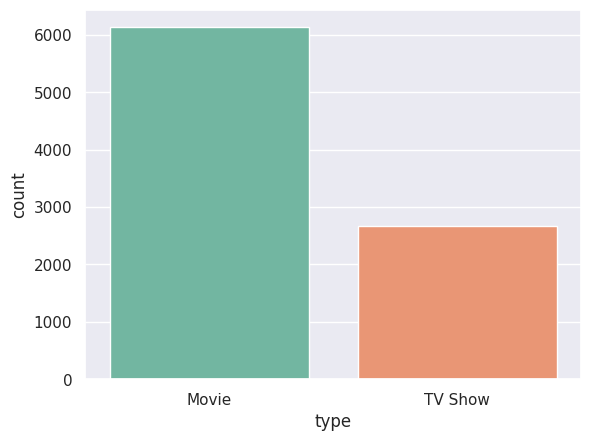

In [ ]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix_overall, palette="Set2")

## Популярное время длительности

In [ ]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs

<ipython-input-16-e96e6df8ea0c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  topdirs = pd.value_counts(netflix_overall['duration'])


,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
94 min,146
...,...
16 min,1
186 min,1
193 min,1


In [ ]:
from plotly import graph_objects as go

fig = go.Figure([
                 go.Bar(x=topdirs.index, y=topdirs.values, text=topdirs.values, marker_color='indianred')
])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

## Анализ фильмов

### Самый привлекательный месяц для релиза контента

### Месяц с наименьшим количеством контента

In [ ]:
netflix_overall.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

,0
date_added,0


In [ ]:
netflix_date.head()

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [ ]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [ ]:
netflix_date.sort_values(by=['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May','June', 'July','August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


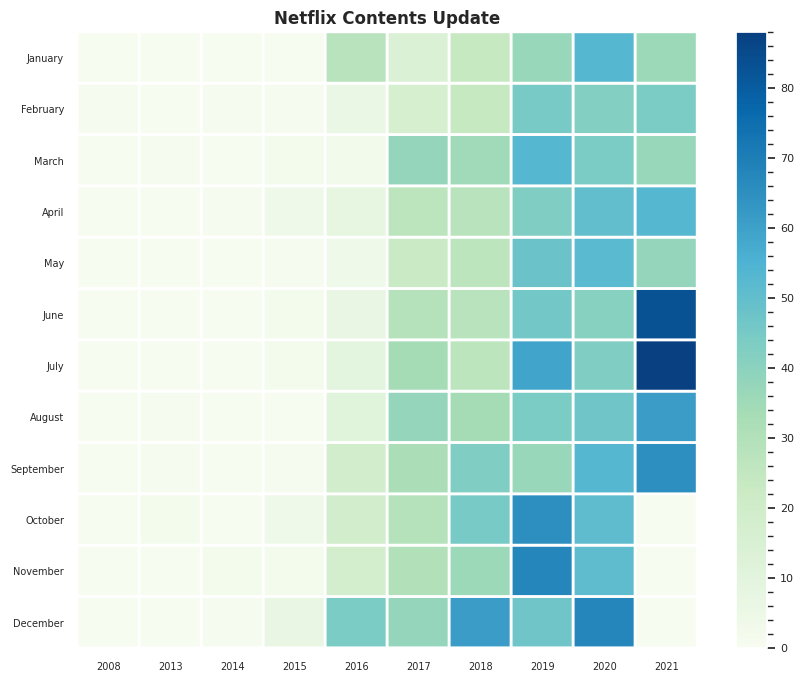

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.pcolor(df, cmap="GnBu", edgecolors='white', linewidth=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

Видно, что в 2019 году в январе и декабре было выпущено мало контента, хотя эти месяцы являются очень прибыльными.

### Анализ рейтингов фильмов

<ipython-input-48-2166f123e0ee>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




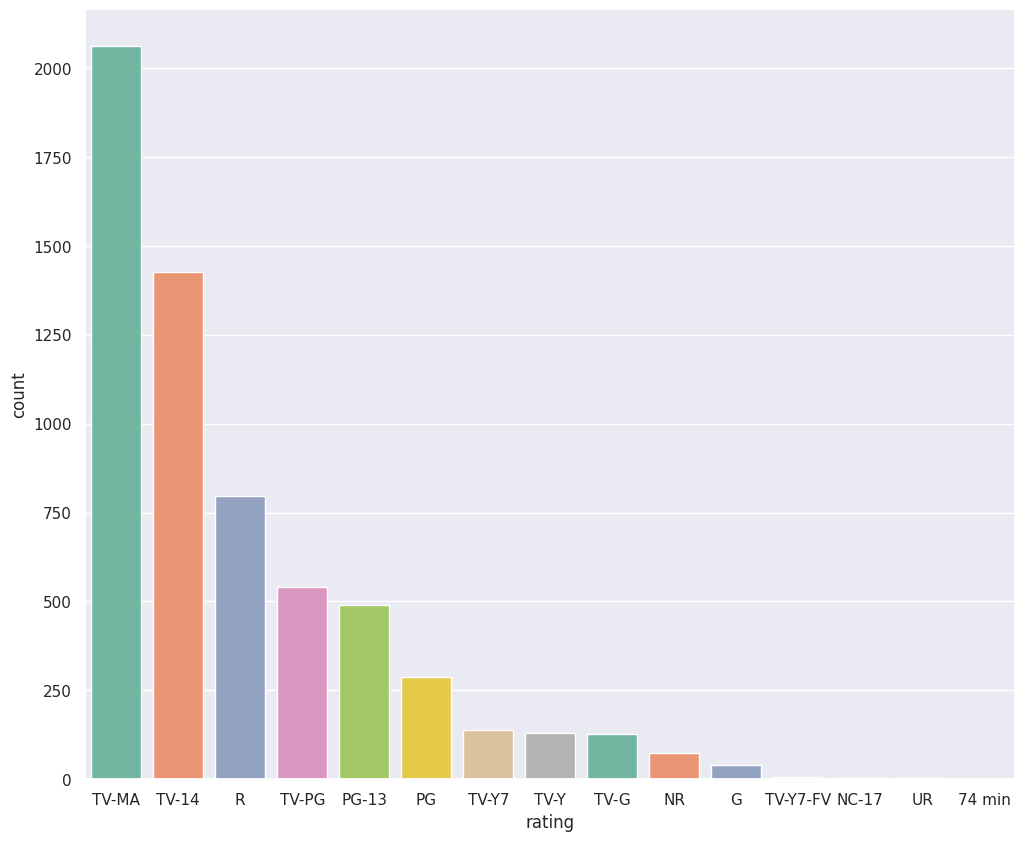

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])

1. TV-MA - Самая большая группа. Такой рейтинг дается только для взрослой аудитории.
2. TV-14 - Вторая группа по величине. Контент фильма с таким рейтингом не подходит для детей младше 14 лет.
3. R - Фильмы не подходят для просмотра детям до 17 лет.

### Анализ года выпуска фильма

<ipython-input-49-6bce3b6b8fe7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




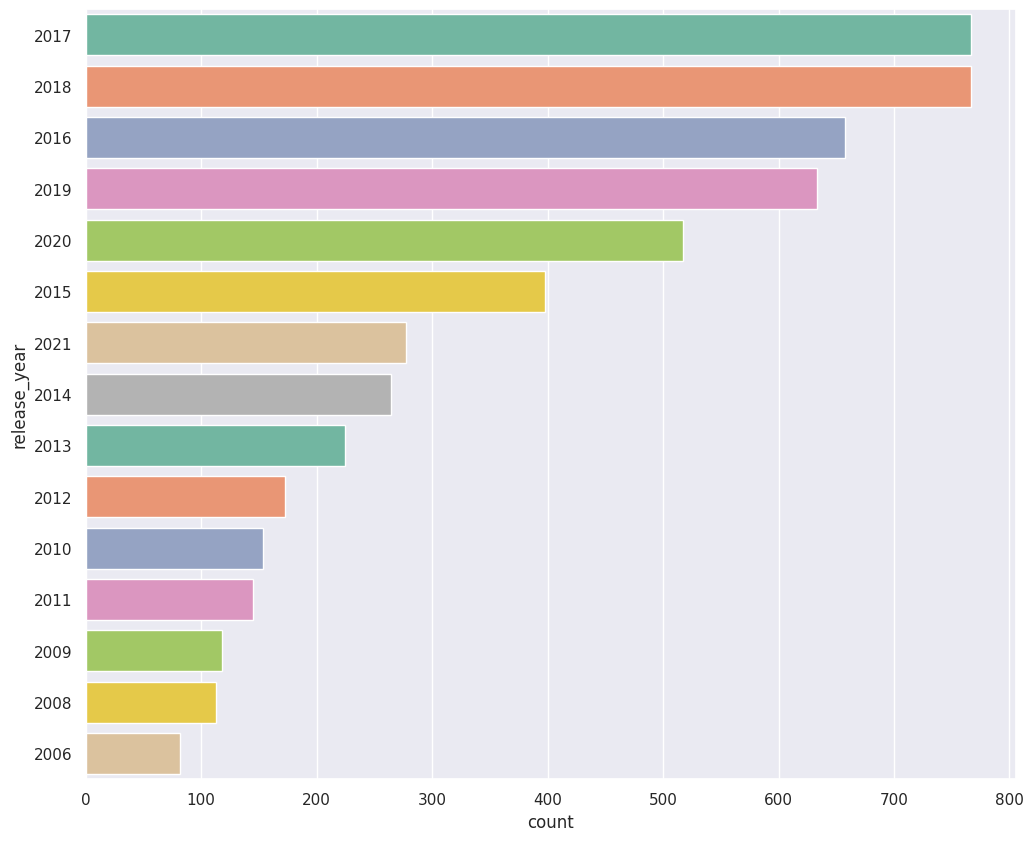

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

Больше всего фильмов вышло в 2017 году

### Топ 10 стран, которые выпускают фильмы

In [ ]:
netflix_movies.isna().sum()

,0
show_id,0
type,0
title,0
director,188
cast,475
country,440
date_added,0
release_year,0
rating,2
duration,3


In [ ]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

<ipython-input-52-304d7fb8dc9c>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
show_id,0
type,0
title,0
director,188
cast,475
country,0
date_added,0
release_year,0
rating,2
duration,3


In [ ]:
netflix_movies['country'].value_counts()

,count
country,
United States,2058
India,893
Unknown,440
United Kingdom,206
Canada,122
...,...
"United Kingdom, Russia, United States",1
"Paraguay, Argentina",1
"United Kingdom, Malawi",1


In [ ]:
countries_mov = {}

cou = list(netflix_movies['country'])
for i in cou:
  i = i.replace(' ','')
  i = list(i.split(','))
  for j in i:
    if j in list(countries_mov.keys()):
      countries_mov[j]+=1
    else:
      countries_mov[j]=1

In [ ]:
countries_mov

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [ ]:
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
countries_fin = countries_fin[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [ ]:
names = [name for name, value in countries_fin]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unknown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [ ]:
values = [value for name, value in countries_fin]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

<ipython-input-68-865f0e44fffb>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



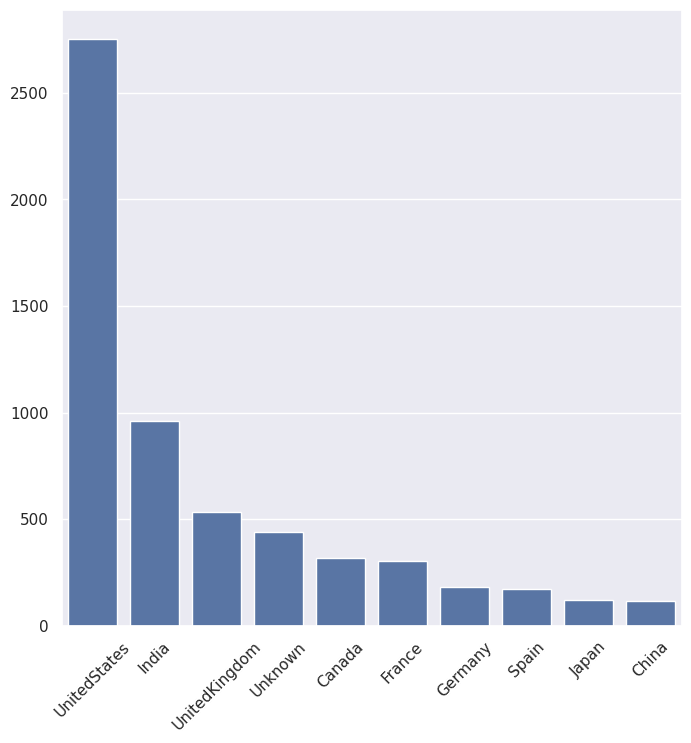

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticklabels(names, rotation=45);

### Анализ продолжительности фильма

In [ ]:
netflix_movies['duration']

,duration
0,90 min
6,91 min
7,125 min
9,104 min
12,127 min
...,...
8801,96 min
8802,158 min
8804,88 min
8805,88 min


In [ ]:
netflix_movies.isna().sum()

,0
show_id,0
type,0
title,0
director,188
cast,475
country,0
date_added,0
release_year,0
rating,2
duration,3


In [ ]:
netflix_movies = netflix_movies[['duration']].dropna()
netflix_movies.isna().sum()

,0
duration,0


In [ ]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')

In [ ]:
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
netflix_movies['duration']

,duration
0,90
6,91
7,125
9,104
12,127
...,...
8801,96
8802,158
8804,88
8805,88


<ipython-input-85-ec4d360bf666>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='duration', ylabel='Density'>

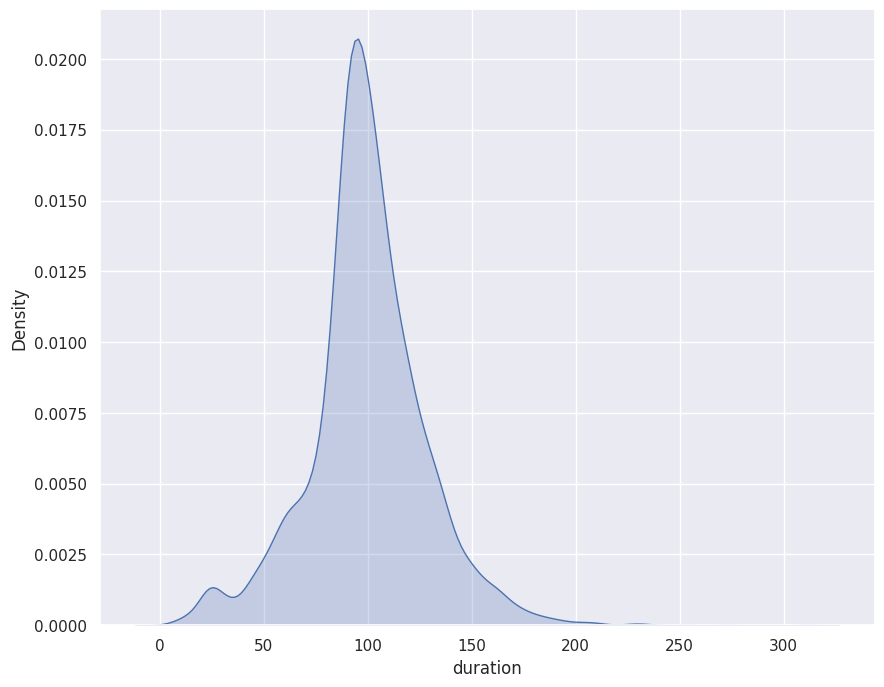

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 8))
sns.kdeplot(data=netflix_movies['duration'], shade=True)

Делаем вывод, что большее количество фильмов длятся 75-120 минут.

### Анализ жанров

In [ ]:
netflix_movies['listed_in']

,listed_in
0,Documentaries
6,Children & Family Movies
7,"Dramas, Independent Movies, International Movies"
9,"Comedies, Dramas"
12,"Dramas, International Movies"
...,...
8801,"Dramas, International Movies, Thrillers"
8802,"Cult Movies, Dramas, Thrillers"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [ ]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
  i = list(i.split(','))
  for j in i:
    gen.append(j.replace(' ',''))

g = Counter(gen)

In [ ]:
g = sorted(g.items(), key=lambda item: g[item[0]], reverse=True)
g

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [ ]:
genre_names = [name for name, value in g]
genre_names

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals',
 'HorrorMovies',
 'Stand-UpComedy',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'AnimeFeatures',
 'CultMovies',
 'Faith&Spirituality',
 'Movies']

In [ ]:
genre_values = [value for name, value in g]
genre_values

[2752,
 2427,
 1674,
 869,
 859,
 756,
 641,
 616,
 577,
 375,
 357,
 343,
 243,
 219,
 116,
 102,
 71,
 71,
 65,
 57]

<ipython-input-97-36e000aa2d14>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



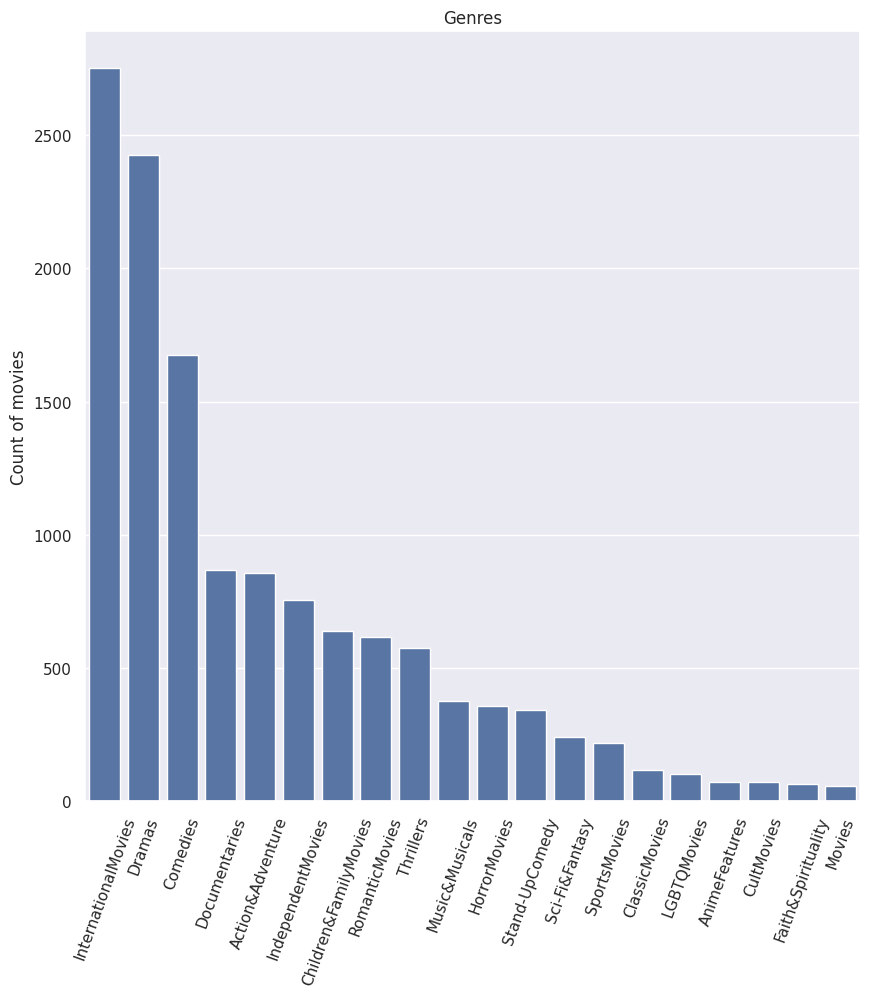

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genre_names, y=genre_values)

ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel("Count of movies")
ax.set_title("Genres");

Международные фильмы, драмы и комедии - топ 3 жанра